In [2]:
import scipy.io as sio
import numpy as np
import sys
from pathlib import Path

def find_repo_root(start: Path) -> Path:
    for p in [start] + list(start.parents):
        if (p / '.git').exists():
            return p
    return start

here = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
repo_root = find_repo_root(here)
sys.path.append(str(repo_root / 'common' / 'python' / 'plotting'))

from geospatial_plotting import plot_region, REGION_BOUNDS


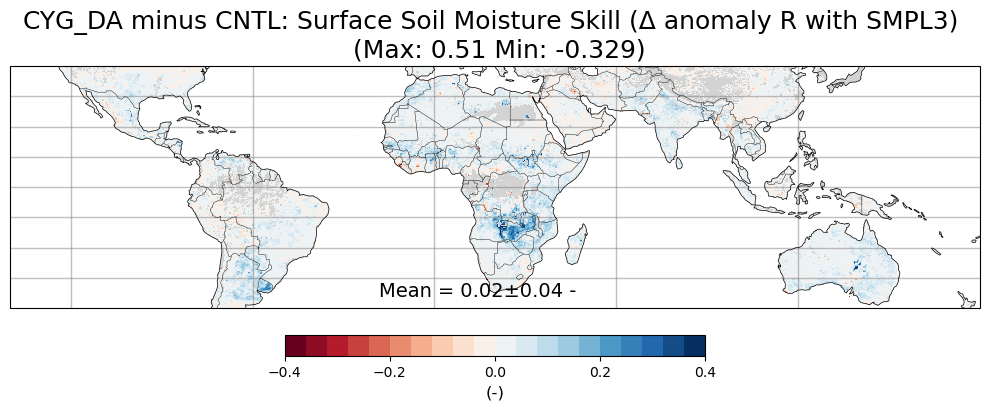

In [3]:
# Open .mat files
data = sio.loadmat('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/Evaluation/IVs/Rdiff_DAv8_M36_cd_minus_OLv8_M36_cd_SMPL3.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_smp = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

map_array = np.empty([len(lons), 3])
map_array.fill(np.nan)
map_array[:, 1] = lons
map_array[:, 2] = lats
map_array[:, 0] = Rdiff_vector_smp

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])


# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA minus CNTL: Surface Soil Moisture Skill (Δ anomaly R with SMPL3) \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='-',
    cmin=-0.4,
    cmax=0.4,
    cmap='RdBu'
)
fig.tight_layout()

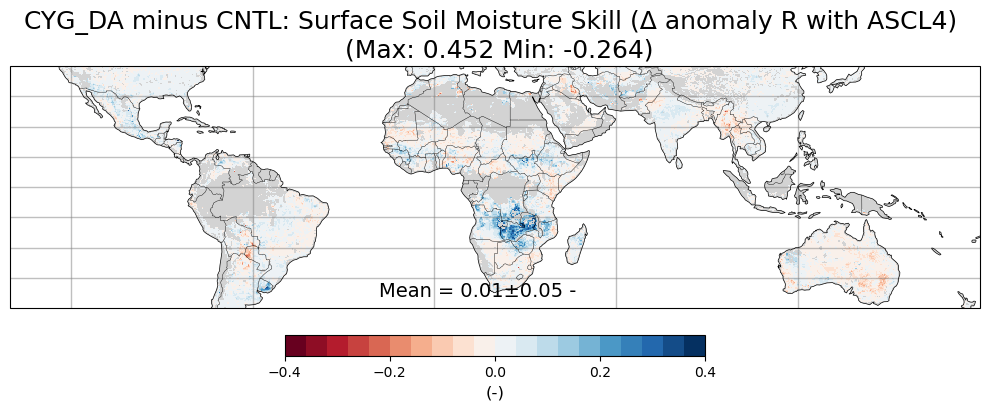

In [5]:
# Open .mat files
data = sio.loadmat('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/Evaluation/IVs/Rdiff_DAv8_M36_cd_minus_OLv8_M36_cd_ASCL4.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_asc = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

map_array = np.empty([len(lons), 3])
map_array.fill(np.nan)
map_array[:, 1] = lons
map_array[:, 2] = lats
map_array[:, 0] = Rdiff_vector_asc

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])


# Plot group map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=True,
    plot_title=f'CYG_DA minus CNTL: Surface Soil Moisture Skill (Δ anomaly R with ASCL4) \n (Max: {maxval:.3g} Min: {minval:.3g})',
    units='-',
    cmin=-0.4,
    cmax=0.4,
    cmap='RdBu'
)
fig.tight_layout()

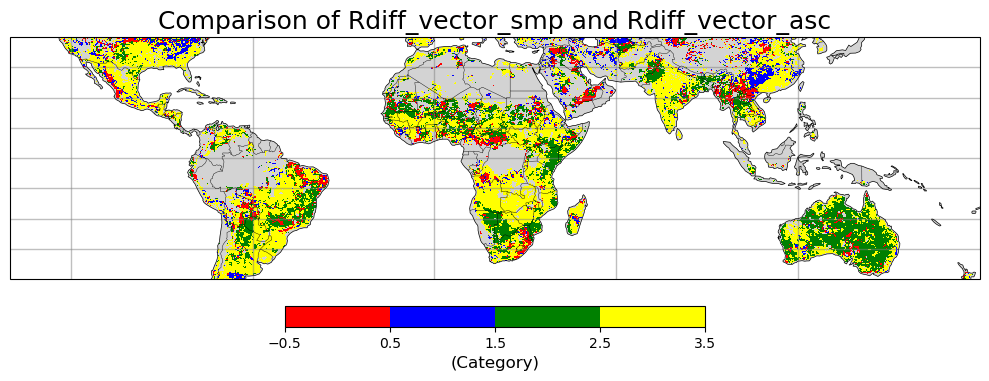

In [6]:
from matplotlib.colors import ListedColormap

# Compare Rdiff_vector_smp and Rdiff_vector_asc
comparison_result = np.empty_like(Rdiff_vector_smp)
comparison_result.fill(np.nan)

# Apply the conditions
comparison_result[(Rdiff_vector_smp > 0) & (Rdiff_vector_asc > 0)] = 3
comparison_result[(Rdiff_vector_smp > 0) & (Rdiff_vector_asc < 0)] = 2
comparison_result[(Rdiff_vector_smp < 0) & (Rdiff_vector_asc > 0)] = 1
comparison_result[(Rdiff_vector_smp < 0) & (Rdiff_vector_asc < 0)] = 0

# Prepare map_array for plotting
comparison_map_array = np.empty([len(lons), 3])
comparison_map_array.fill(np.nan)
comparison_map_array[:, 1] = lons
comparison_map_array[:, 2] = lats
comparison_map_array[:, 0] = comparison_result

# Plot the comparison map
# Define a custom colormap with good contrast
custom_cmap = ListedColormap(['red', 'blue', 'green', 'yellow'])

fig, ax = plot_region(
    comparison_map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title='Comparison of Rdiff_vector_smp and Rdiff_vector_asc',
    units='Category',
    cmin=-0.5,
    cmax=3.5,
    cmap=custom_cmap
)
fig.tight_layout()

In [7]:
# ...existing code...
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from geospatial_plotting import plot_region, REGION_BOUNDS

fn = "/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/Evaluation/IVs/aridity_indices_model_net_rad_20180801_20240630.nc4"

# open dataset and inspect
ds = xr.open_dataset(fn, decode_times=True)
print(ds)                 # quick view of variables / coords
print("time values:", ds['time'].values)

ai = ds['AI_clim'].values   # shape (tile,)
lon = ds['lon'].isel(time=1).values                      # coords usually constant per tile
lat = ds['lat'].isel(time=1).values
title_time = "Climatology"

print('max.min of lon, lat, ai:')
print(np.nanmax(lon), np.nanmin(lon))
print(np.nanmax(lat), np.nanmin(lat))
print(np.nanmax(ai), np.nanmin(ai))


<xarray.Dataset> Size: 18MB
Dimensions:             (time: 7, tile: 70773)
Coordinates:
  * time                (time) datetime64[ns] 56B 2018-01-01 ... 2024-01-01
  * tile                (tile) int64 566kB 0 1 2 3 4 ... 70769 70770 70771 70772
    lat                 (time, tile) float32 2MB ...
    lon                 (time, tile) float32 2MB ...
    year                (time) int64 56B ...
Data variables: (12/13)
    AI                  (time, tile) float32 2MB ...
    Budyko_phi          (time, tile) float32 2MB ...
    CMI                 (time, tile) float32 2MB ...
    DeMartonne          (time, tile) float32 2MB ...
    AI_clim             (tile) float32 283kB ...
    Budyko_phi_clim     (tile) float32 283kB ...
    ...                  ...
    DeMartonne_clim     (tile) float32 283kB ...
    P_annual            (time, tile) float32 2MB ...
    PET_annual          (time, tile) float32 2MB ...
    mean_greeness_clim  (tile) float32 283kB ...
    mean_lai_clim       (tile) float3

AI_clim Climatology max 6.19 min 0.00047


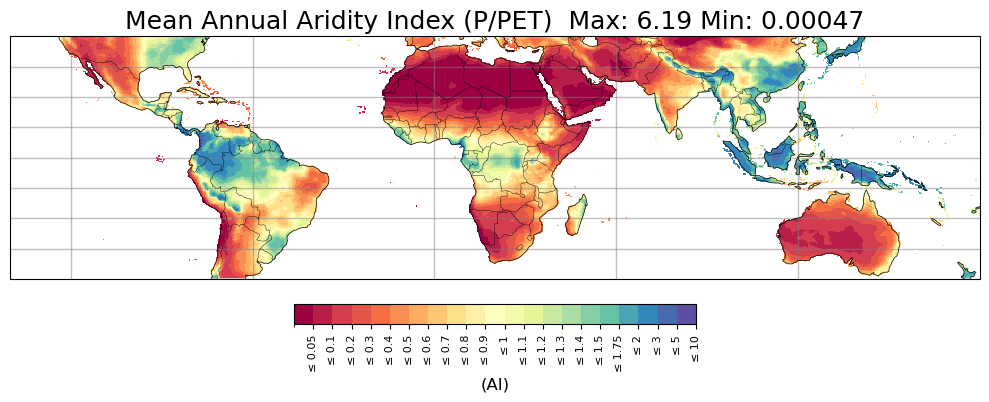

In [8]:


# flatten and build map array expected by plot_region: columns [value, lon, lat]
ai_flat = np.squeeze(ai)
lon_flat = np.squeeze(lon)
lat_flat = np.squeeze(lat)
n = ai_flat.size

map_array = np.empty((n, 3), dtype=float)
map_array.fill(np.nan)
map_array[:, 0] = ai_flat
map_array[:, 1] = lon_flat
map_array[:, 2] = lat_flat

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

print(f"AI_clim {title_time} max {maxval:.3g} min {minval:.3g}")

# 21 bin edges (same thresholds as the legend)
ai_edges = np.array([
    0.00, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60,
    0.70, 0.80, 0.90, 1.00, 1.10, 1.20, 1.30, 1.40,
    1.50, 1.75, 2.00, 3.00, 5.00, 10.00
])

# --- Example usage with an array 'AI' (same shape as your map) --
# Create a colormap with 20 colors (one for each bin)
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title=f"Mean Annual Aridity Index (P/PET)  Max: {maxval:.3g} Min: {minval:.3g}",
    units='AI',
    cmin=0,
    cmax=0.6,
    discrete_edges=ai_edges,     # <<< turn on discrete Spectral
    base_cmap="Spectral"
)
fig.tight_layout()
plt.show()
# ...existing code...

mean_lai_clim max 5.73 min 0


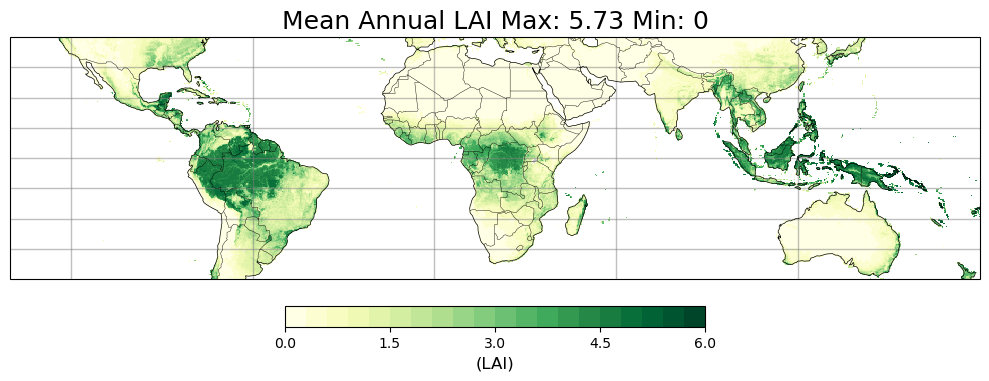

In [9]:
# Extract mean_lai_clim from the dataset
mean_lai_clim = ds['mean_lai_clim'].values  # shape (tile,)

# Flatten and build map array expected by plot_region: columns [value, lon, lat]
mean_lai_flat = np.squeeze(mean_lai_clim)
map_array = np.empty((n, 3), dtype=float)
map_array.fill(np.nan)
map_array[:, 0] = mean_lai_flat
map_array[:, 1] = lon_flat
map_array[:, 2] = lat_flat

# Calculate max and min values for the plot
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

print(f"mean_lai_clim max {maxval:.3g} min {minval:.3g}")

# Plot the map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title=f"Mean Annual LAI Max: {maxval:.3g} Min: {minval:.3g}",
    units='LAI',
    cmin=0,
    cmax=6,
    cmap="YlGn"
)
fig.tight_layout()
plt.show()

max_lai_clim max 6.22 min 0


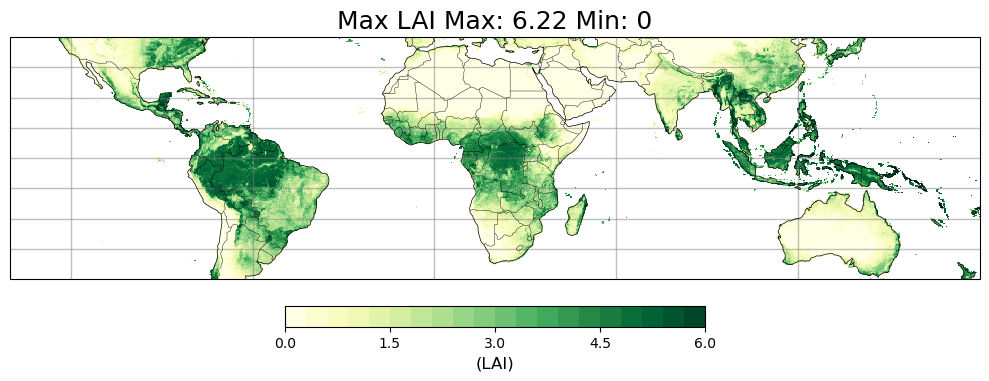

In [10]:
# Extract max_lai_clim from the dataset
max_lai_clim = ds['max_lai_clim'].values  # shape (tile,)

# Flatten and build map array expected by plot_region: columns [value, lon, lat]
max_lai_flat = np.squeeze(max_lai_clim)
map_array = np.empty((n, 3), dtype=float)
map_array.fill(np.nan)
map_array[:, 0] = max_lai_flat
map_array[:, 1] = lon_flat
map_array[:, 2] = lat_flat

# Calculate max and min values for the plot
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

print(f"max_lai_clim max {maxval:.3g} min {minval:.3g}")

# Plot the map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title=f"Max LAI Max: {maxval:.3g} Min: {minval:.3g}",
    units='LAI',
    cmin=0,
    cmax=6,
    cmap="YlGn"
)
fig.tight_layout()
plt.show()

mean_greeness_clim max 0.992 min 0.0511


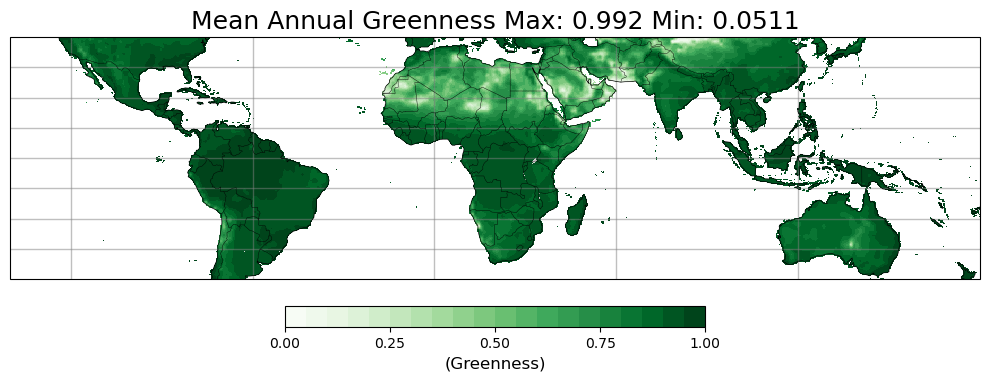

In [11]:
# Extract mean_greeness_clim from the dataset
mean_greeness_clim = ds['mean_greeness_clim'].values  # shape (tile,)

# Flatten and build map array expected by plot_region: columns [value, lon, lat]
mean_greeness_flat = np.squeeze(mean_greeness_clim)
map_array = np.empty((n, 3), dtype=float)
map_array.fill(np.nan)
map_array[:, 0] = mean_greeness_flat
map_array[:, 1] = lon_flat
map_array[:, 2] = lat_flat

# Calculate max and min values for the plot
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

print(f"mean_greeness_clim max {maxval:.3g} min {minval:.3g}")

# Plot the map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title=f"Mean Annual Greenness Max: {maxval:.3g} Min: {minval:.3g}",
    units='Greenness',
    cmin=0,
    cmax=1,
    cmap="Greens"
)
fig.tight_layout()
plt.show()

In [12]:
# Open .mat files
data = sio.loadmat('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/Evaluation/IVs/Rdiff_DAv8_M36_cd_minus_OLv8_M36_cd_SMPL3.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_smp = np.squeeze(data['Rdiff_vector'])
lons_smp = np.squeeze(data['lons'])
lats_smp = np.squeeze(data['lats'])

# Open .mat files
data = sio.loadmat('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/CYGNSS_Experiments/Evaluation/IVs/Rdiff_DAv8_M36_cd_minus_OLv8_M36_cd_ASCL4.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_asc = np.squeeze(data['Rdiff_vector'])
lons_asc = np.squeeze(data['lons'])
lats_asc = np.squeeze(data['lats'])

print('lengths of lons, lats, Rdiff_vector:')
print(len(lons_smp), len(lats_smp), len(Rdiff_vector_smp))
print(len(lons_asc), len(lats_asc), len(Rdiff_vector_asc))
print(len(lon_flat), len(lat_flat), n)

# Find the Rdiff_vector_smp and Rdiff_vector_asc points that fall within the lon/lat bounds of the GEOS dataset and create new arrays
lon_min, lon_max = np.nanmin(lon_flat), np.nanmax(lon_flat)
lat_min, lat_max = np.nanmin(lat_flat), np.nanmax(lat_flat)
print(f"GEOS lon range: {lon_min} to {lon_max}")
print(f"GEOS lat range: {lat_min} to {lat_max}")
smp_mask = (lons_smp >= lon_min) & (lons_smp <= lon_max) & (lats_smp >= lat_min) & (lats_smp <= lat_max)
asc_mask = (lons_asc >= lon_min) & (lons_asc <= lon_max) & (lats_asc >= lat_min) & (lats_asc <= lat_max)
Rdiff_vector_smp_sub = Rdiff_vector_smp[smp_mask]
Rdiff_vector_asc_sub = Rdiff_vector_asc[asc_mask]
lons_smp_sub = lons_smp[smp_mask]
lats_smp_sub = lats_smp[smp_mask]
lons_asc_sub = lons_asc[asc_mask]
lats_asc_sub = lats_asc[asc_mask]
print(f"Number of CYGNSS SMPL3 points within GEOS bounds: {len(Rdiff_vector_smp_sub)}")
print(f"Number of CYGNSS ASCL4 points within GEOS bounds: {len(Rdiff_vector_asc_sub)}")


lengths of lons, lats, Rdiff_vector:
391384 391384 391384
391384 391384 391384
70773 70773 70773
GEOS lon range: -179.81329345703125 to 179.81329345703125
GEOS lat range: -39.58489990234375 to 39.58489990234375
Number of CYGNSS SMPL3 points within GEOS bounds: 248712
Number of CYGNSS ASCL4 points within GEOS bounds: 248712


In [13]:

# For each lat/lon point in the GEOS dataset, find the nearest point in the observation datasets and create new arrays
Rdiff_vector_smp_matched = np.full(n, np.nan)
Rdiff_vector_asc_matched = np.full(n, np.nan)
for i in range(n):
    lon_i = lon_flat[i]
    lat_i = lat_flat[i]
    # Find nearest point in SMPL3
    if len(lons_smp_sub) > 0:
        distances_smp = np.sqrt((lons_smp_sub - lon_i)**2 + (lats_smp_sub - lat_i)**2)
        min_index_smp = np.argmin(distances_smp)
        if distances_smp[min_index_smp] < 0.1:  # only accept if within 0.1 degrees
            Rdiff_vector_smp_matched[i] = Rdiff_vector_smp_sub[min_index_smp]
    # Find nearest point in ASCL4
    if len(lons_asc_sub) > 0:
        distances_asc = np.sqrt((lons_asc_sub - lon_i)**2 + (lats_asc_sub - lat_i)**2)
        min_index_asc = np.argmin(distances_asc)
        if distances_asc[min_index_asc] < 0.1:  # only accept if within 0.1 degrees
            Rdiff_vector_asc_matched[i] = Rdiff_vector_asc_sub[min_index_asc]
# Count how many points were matched
num_matched_smp = np.sum(~np.isnan(Rdiff_vector_smp_matched))
num_matched_asc = np.sum(~np.isnan(Rdiff_vector_asc_matched))
print(f"Number of GEOS points matched to CYGNSS SMPL3: {num_matched_smp}")
print(f"Number of GEOS points matched to CYGNSS ASCL4: {num_matched_asc}")


Number of GEOS points matched to CYGNSS SMPL3: 54879
Number of GEOS points matched to CYGNSS ASCL4: 41193


Mean Combined max 0.501 min -0.329


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_4401/2364292459.py:2: RuntimeWarning: Mean of empty slice
  mean_combined = np.nanmean([Rdiff_vector_smp_matched, Rdiff_vector_asc_matched], axis=0)


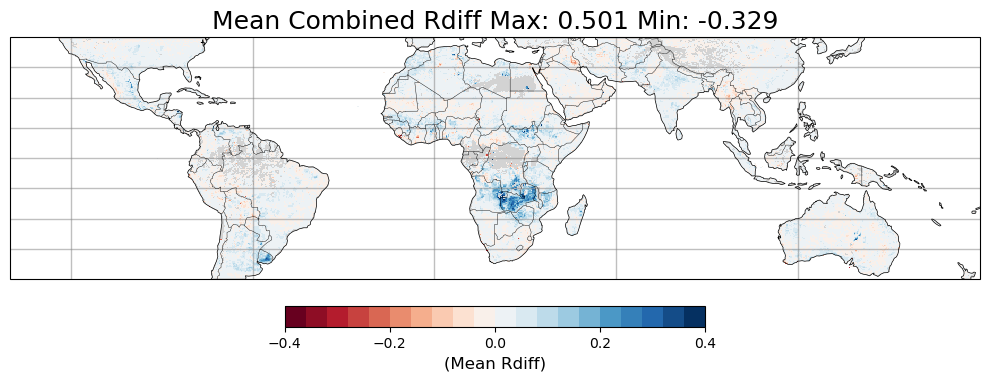

In [14]:
# Calculate the mean of the two variables
mean_combined = np.nanmean([Rdiff_vector_smp_matched, Rdiff_vector_asc_matched], axis=0)

# Prepare map_array for plotting
map_array = np.empty((n, 3), dtype=float)
map_array.fill(np.nan)
map_array[:, 0] = mean_combined
map_array[:, 1] = lon_flat
map_array[:, 2] = lat_flat

# Calculate max and min values for the plot
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

print(f"Mean Combined max {maxval:.3g} min {minval:.3g}")

# Plot the map
fig, ax = plot_region(
    map_array,
    region_bounds=REGION_BOUNDS['cygnss'],
    meanflag=False,
    plot_title=f"Mean Combined Rdiff Max: {maxval:.3g} Min: {minval:.3g}",
    units='Mean Rdiff',
    cmin=-0.4,
    cmax=0.4,
    cmap="RdBu"
)
fig.tight_layout()
plt.show()

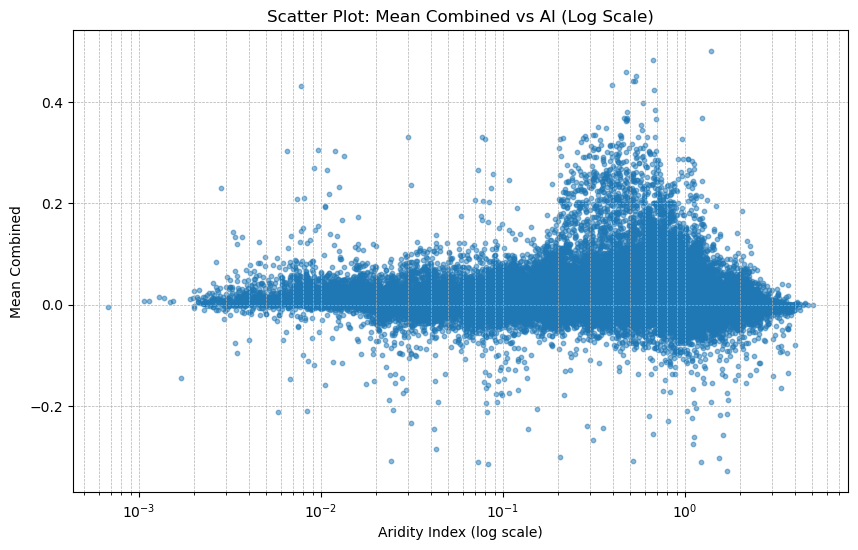

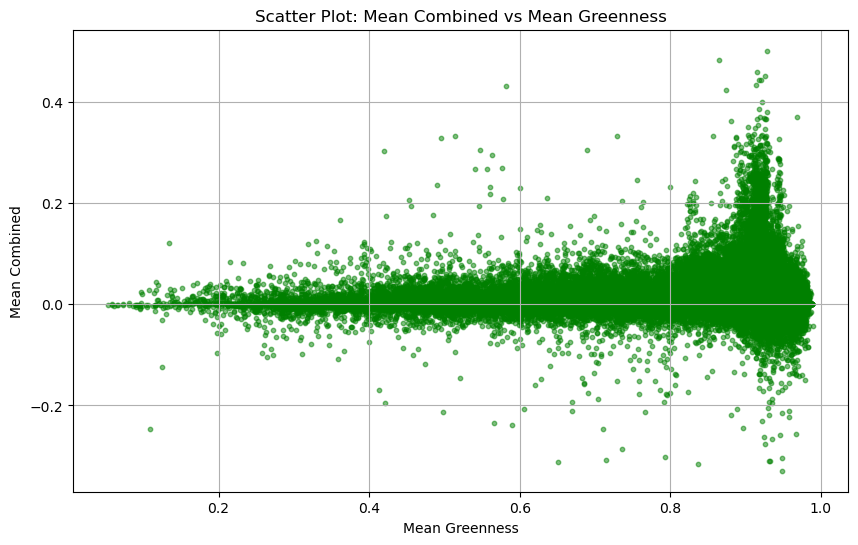

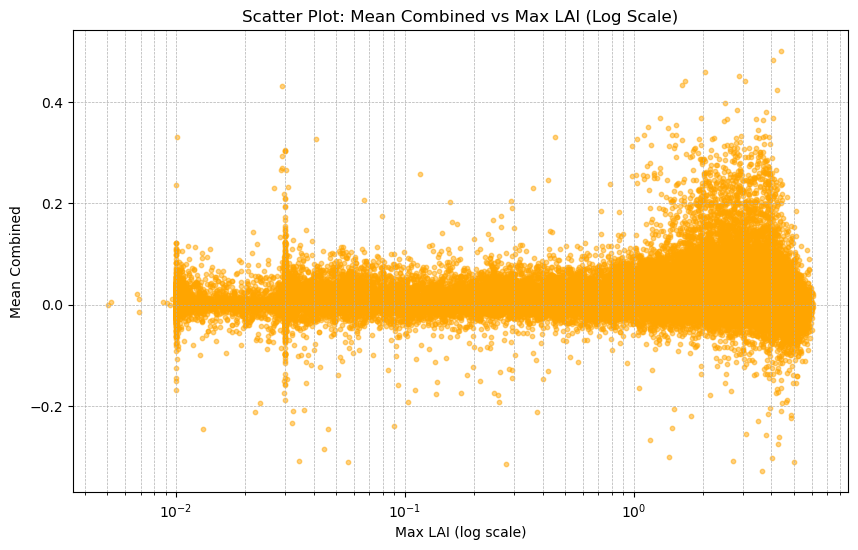

In [15]:
# Scatter plot of mean_combined vs AI with log x-axis
plt.figure(figsize=(10, 6))
plt.scatter(ai_flat, mean_combined, s=10, alpha=0.5)
plt.xscale('log')
plt.title("Scatter Plot: Mean Combined vs AI (Log Scale)")
plt.xlabel("Aridity Index (log scale)")
plt.ylabel("Mean Combined")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Scatter plot of mean_combined vs Mean Greenness
plt.figure(figsize=(10, 6))
plt.scatter(mean_greeness_flat, mean_combined, s=10, alpha=0.5, color='green')
plt.title("Scatter Plot: Mean Combined vs Mean Greenness")
plt.xlabel("Mean Greenness")
plt.ylabel("Mean Combined")
plt.grid(True)
plt.show()

# Scatter plot of mean_combined vs Max LAI with log x-axis
plt.figure(figsize=(10, 6))
plt.scatter(max_lai_flat, mean_combined, alpha=0.5, s=10, color='orange')
plt.xscale('log')
plt.title("Scatter Plot: Mean Combined vs Max LAI (Log Scale)")
plt.xlabel("Max LAI (log scale)")
plt.ylabel("Mean Combined")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

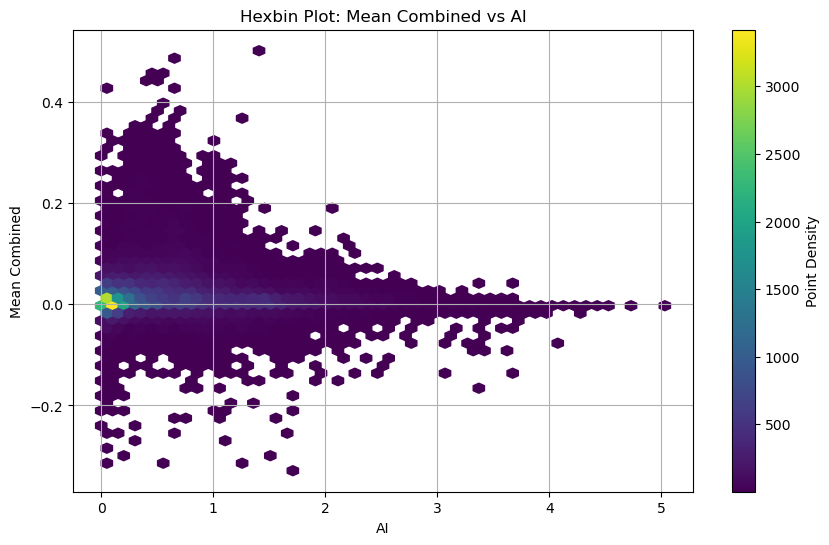

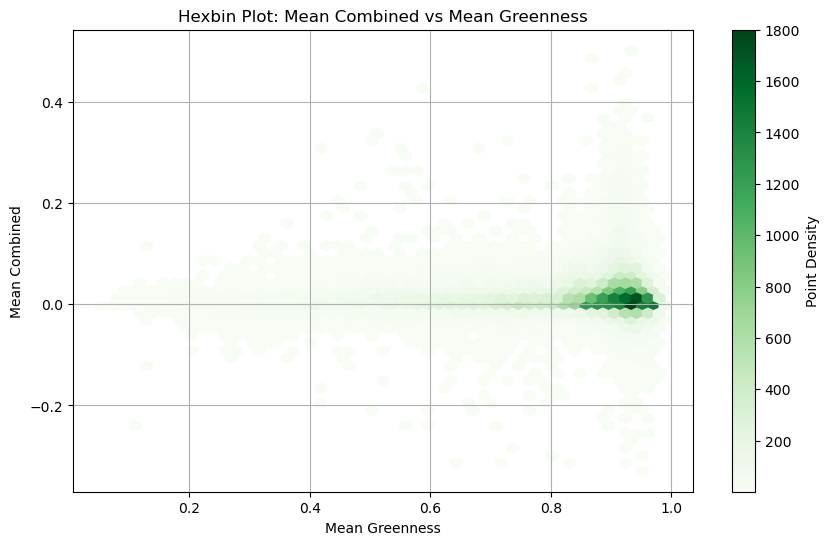

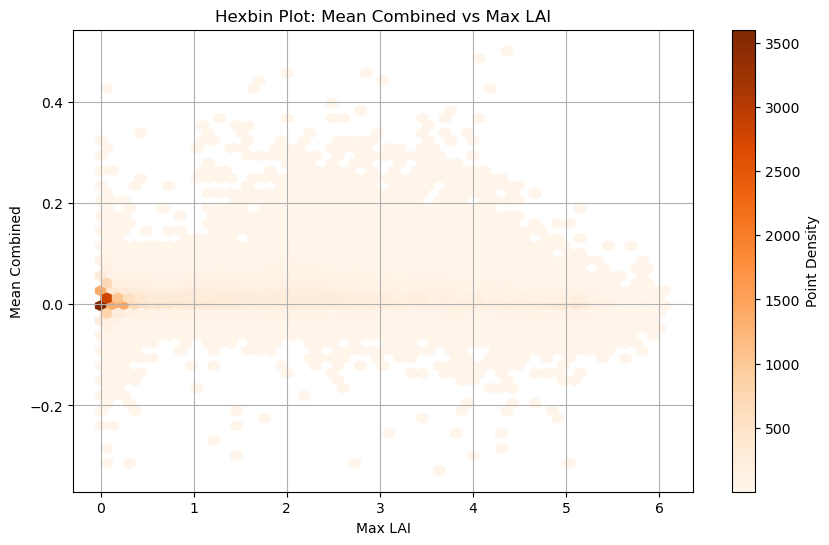

In [16]:
# Hexbin plot of mean_combined vs AI
plt.figure(figsize=(10, 6))
plt.hexbin(ai_flat, mean_combined, gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Point Density')
plt.title("Hexbin Plot: Mean Combined vs AI")
plt.xlabel("AI")
plt.ylabel("Mean Combined")
plt.grid(True)
plt.show()

# Hexbin plot of mean_combined vs Mean Greenness
plt.figure(figsize=(10, 6))
plt.hexbin(mean_greeness_flat, mean_combined, gridsize=50, cmap='Greens', mincnt=1)
plt.colorbar(label='Point Density')
plt.title("Hexbin Plot: Mean Combined vs Mean Greenness")
plt.xlabel("Mean Greenness")
plt.ylabel("Mean Combined")
plt.grid(True)
plt.show()

# Hexbin plot of mean_combined vs Max LAI
plt.figure(figsize=(10, 6))
plt.hexbin(max_lai_flat, mean_combined, gridsize=50, cmap='Oranges', mincnt=1)
plt.colorbar(label='Point Density')
plt.title("Hexbin Plot: Mean Combined vs Max LAI")
plt.xlabel("Max LAI")
plt.ylabel("Mean Combined")
plt.grid(True)
plt.show()

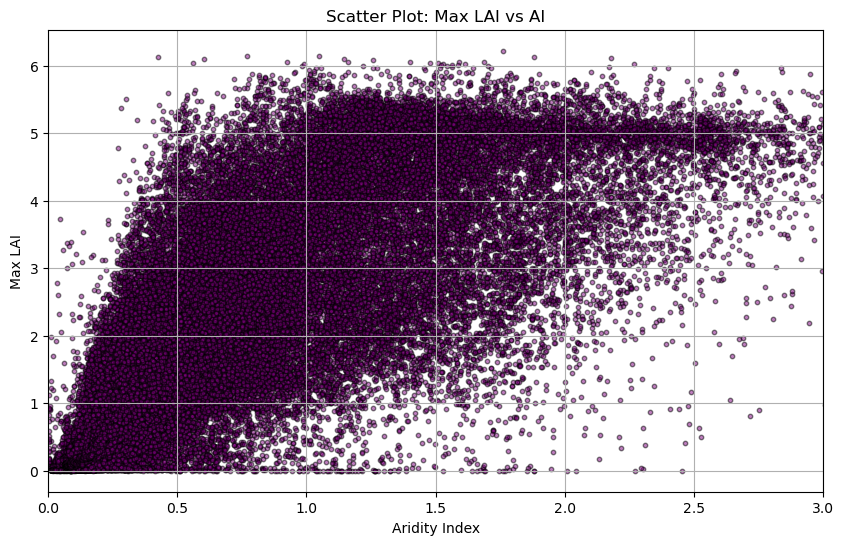

In [17]:
# Simple scatter plot of Max LAI vs AI
plt.figure(figsize=(10, 6))
plt.scatter(ai_flat, max_lai_flat, alpha=0.5, edgecolor='k', color='purple', s=10)
plt.title("Scatter Plot: Max LAI vs AI")
plt.xlabel("Aridity Index")
plt.ylabel("Max LAI")
plt.grid(True)
plt.xlim([0.0, 3])
plt.show()

In [19]:
# Example: assume ai and mean_combined are 1D numpy arrays of equal length
valid = np.isfinite(ai) & np.isfinite(mean_combined) & (np.abs(mean_combined) > 0.005)
aiv = ai[valid]
mc = mean_combined[valid]


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_4401/575268110.py:5: RuntimeWarning: Mean of empty slice.
  bin_means = [mc[bin_idx == i].mean() for i in range(1, len(bins))]
/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


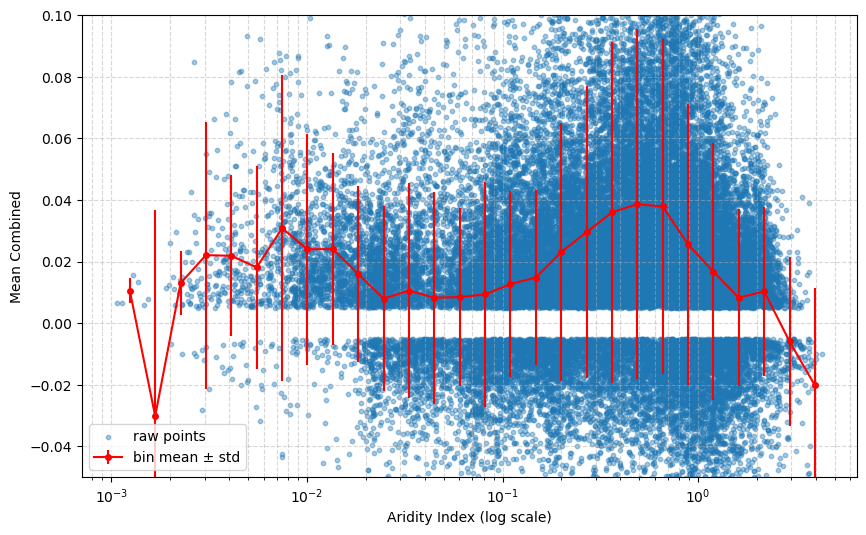

In [20]:

# Define log-spaced bins
bins = np.logspace(np.log10(aiv.min()), np.log10(ai.max()), 30)
bin_idx = np.digitize(aiv, bins)

bin_means = [mc[bin_idx == i].mean() for i in range(1, len(bins))]
bin_stds  = [mc[bin_idx == i].std() for i in range(1, len(bins))]
bin_centers = (bins[:-1] * bins[1:])**0.5  # geometric mean (good for log scale)

plt.figure(figsize=(10,6))
plt.scatter(aiv, mc, alpha=0.4, s=10, label="raw points")
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', color='red', label="bin mean ± std", markersize=4)
plt.xscale('log')
plt.xlabel("Aridity Index (log scale)")
plt.ylabel("Mean Combined")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.ylim(-0.05, 0.1)
plt.show()


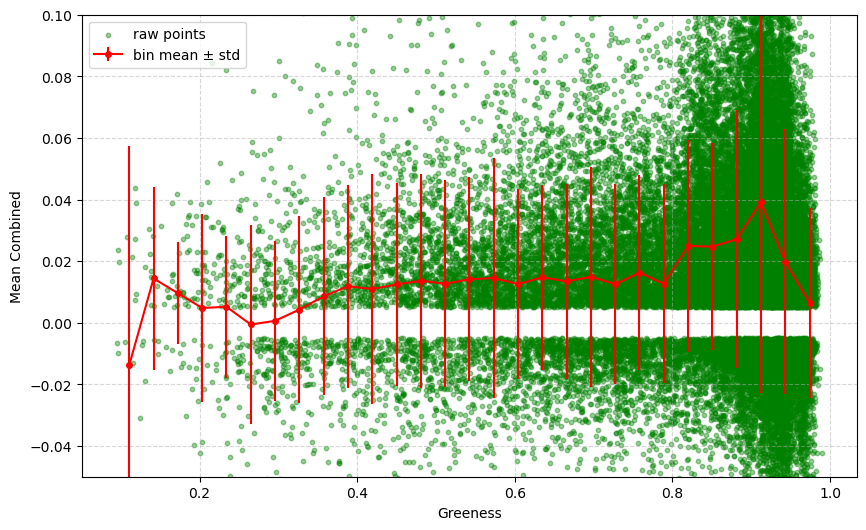

In [21]:
# Example: assume ai and mean_combined are 1D numpy arrays of equal length
valid = np.isfinite(mean_greeness_flat) & np.isfinite(mean_combined) & (np.abs(mean_combined) > 0.005)
ai = mean_greeness_flat[valid]
mc = mean_combined[valid]

# Define linear-spaced bins
bins = np.linspace(ai.min(), ai.max(), 30)
bin_idx = np.digitize(ai, bins)

bin_means = [mc[bin_idx == i].mean() for i in range(1, len(bins))]
bin_stds  = [mc[bin_idx == i].std() for i in range(1, len(bins))]
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # arithmetic mean for linear scale

plt.figure(figsize=(10, 6))
plt.scatter(ai, mc, alpha=0.4, s=10, color='green', label="raw points")
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', color='red', label="bin mean ± std", markersize=4)
plt.xlabel("Greeness")
plt.ylabel("Mean Combined")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(-0.05, 0.1)
plt.show()


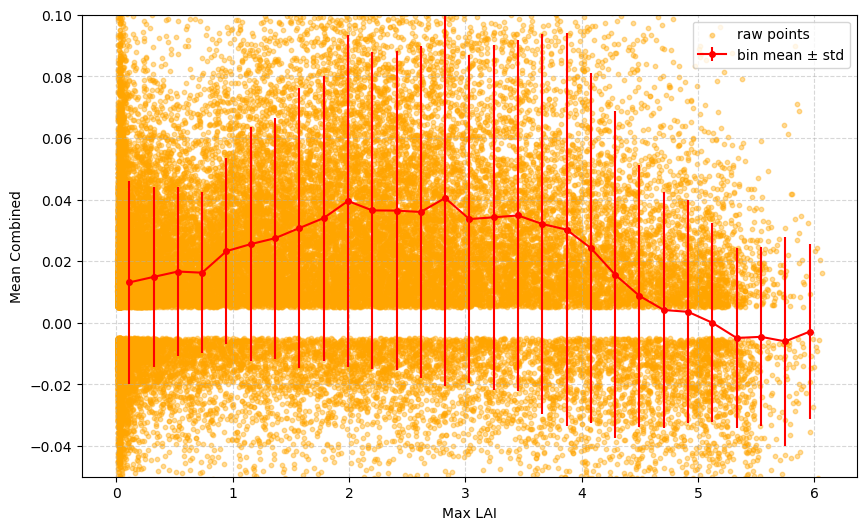

In [22]:
# Example: assume ai and mean_combined are 1D numpy arrays of equal length
valid = np.isfinite(max_lai_flat) & np.isfinite(mean_combined) & (np.abs(mean_combined) > 0.005)
ai = max_lai_flat[valid]
mc = mean_combined[valid]

# Define linear-spaced bins
bins = np.linspace(ai.min(), ai.max(), 30)
bin_idx = np.digitize(ai, bins)

bin_means = [mc[bin_idx == i].mean() for i in range(1, len(bins))]
bin_stds  = [mc[bin_idx == i].std() for i in range(1, len(bins))]
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # arithmetic mean for linear scale

plt.figure(figsize=(10, 6))
plt.scatter(ai, mc, alpha=0.4, s=10, color='orange', label="raw points")
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', color='red', label="bin mean ± std", markersize=4)
plt.xlabel("Max LAI")
plt.ylabel("Mean Combined")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.ylim(-0.05, 0.1)
plt.show()

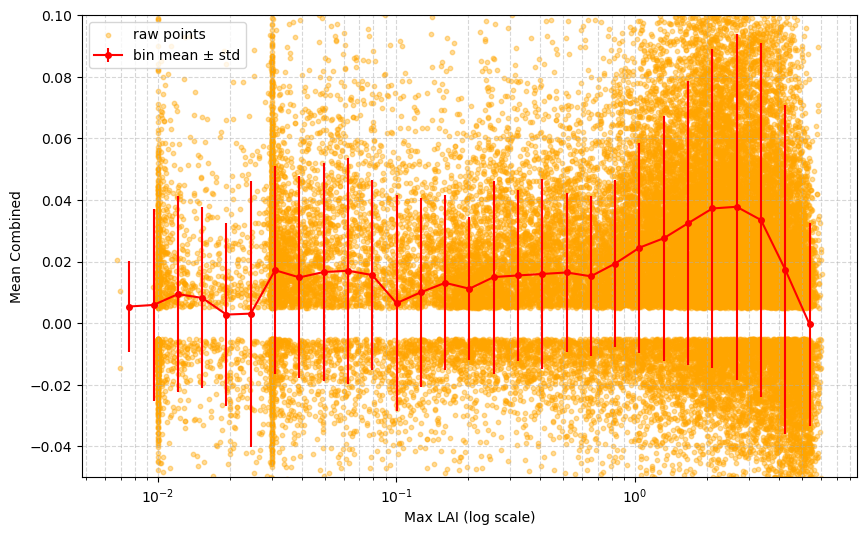

In [23]:
# Example: assume ai and mean_combined are 1D numpy arrays of equal length
valid = np.isfinite(max_lai_flat) & np.isfinite(mean_combined) & (np.abs(mean_combined) > 0.005)
ai = max_lai_flat[valid]
mc = mean_combined[valid]

# Define log-spaced bins
bins = np.logspace(np.log10(ai.min()), np.log10(ai.max()), 30)
bin_idx = np.digitize(ai, bins)

bin_means = [mc[bin_idx == i].mean() for i in range(1, len(bins))]
bin_stds  = [mc[bin_idx == i].std() for i in range(1, len(bins))]
bin_centers = (bins[:-1] * bins[1:])**0.5  # geometric mean (good for log scale)

plt.figure(figsize=(10, 6))
plt.scatter(ai, mc, alpha=0.4, s=10, color='orange', label="raw points")
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o-', color='red', label="bin mean ± std", markersize=4)
plt.xscale('log')
plt.xlabel("Max LAI (log scale)")
plt.ylabel("Mean Combined")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.ylim(-0.05, 0.1)
plt.show()